<a href="https://colab.research.google.com/github/simonyelisey/Raifhack-DS-2021/blob/main/raifhack_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,gc

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
os.chdir('/content/drive/MyDrive')

In [88]:
os.listdir('raifhack_ds')

['raifhack_ds']

In [89]:
df_train = pd.read_csv('raifhack_ds/raifhack_ds/data/train.csv', index_col='id')
df_test = pd.read_csv('raifhack_ds/raifhack_ds/data/test.csv', index_col='id')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [90]:
df_train = df_train[df_train['price_type'] == 1]

In [91]:
print(f'В тренировочной выборке {df_train.shape[0]} наблюдений и {df_train.shape[1]} колонок.')
print(f'В тестовой выборке {df_test.shape[0]} наблюдений и {df_test.shape[1]} колонок.')

В тренировочной выборке 4493 наблюдений и 76 колонок.
В тестовой выборке 2974 наблюдений и 75 колонок.


Во всей выборке 69 признаков в числовом формате, 6 признаков в строчном формате. 

Целевая переменная - **'per_square_meter_price'**.

Описание каждого признака в файле `opisanie_priznakov.csv`

In [92]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4493 entries, COL_62 to COL_280637
Data columns (total 76 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   city                                 4493 non-null   object 
 1   floor                                2029 non-null   object 
 2   lat                                  4493 non-null   float64
 3   lng                                  4493 non-null   float64
 4   osm_amenity_points_in_0.001          4493 non-null   int64  
 5   osm_amenity_points_in_0.005          4493 non-null   int64  
 6   osm_amenity_points_in_0.0075         4493 non-null   int64  
 7   osm_amenity_points_in_0.01           4493 non-null   int64  
 8   osm_building_points_in_0.001         4493 non-null   int64  
 9   osm_building_points_in_0.005         4493 non-null   int64  
 10  osm_building_points_in_0.0075        4493 non-null   int64  
 11  osm_building_points_in_0

## Пропуски

In [93]:
print(f'В тренировочной выборке в {(df_train.isna().sum() > 0).sum()} признаках наблюдаются пропуски.')
print(f'В тестовой выборке в {(df_test.isna().sum() > 0).sum()} признаках наблюдаются пропуски.')

В тренировочной выборке в 9 признаках наблюдаются пропуски.
В тестовой выборке в 8 признаках наблюдаются пропуски.


Больше всего пропусков в обоих выборках в признаке **'floor'**.

В тренировочной: более 54%

В тестовой: более 43%

В остальных признаках количество пропусков незначительно.

In [94]:
(df_train.isna().mean() * 100).sort_values(ascending=False).head(10)

floor                             54.840864
reform_mean_floor_count_500        1.736034
reform_mean_year_building_500      1.691520
reform_house_population_500        1.513465
reform_mean_floor_count_1000       1.402181
reform_mean_year_building_1000     1.357667
reform_house_population_1000       1.224126
street                             0.378366
osm_city_nearest_population        0.022257
osm_culture_points_in_0.005        0.000000
dtype: float64

In [95]:
(df_test.isna().mean() * 100).sort_values(ascending=False).head(10)

floor                             43.745797
reform_house_population_500        1.613988
reform_mean_year_building_500      1.613988
reform_mean_floor_count_500        1.613988
reform_mean_year_building_1000     1.176866
reform_mean_floor_count_1000       1.176866
reform_house_population_1000       1.176866
street                             0.201748
osm_culture_points_in_0.01         0.000000
osm_crossing_points_in_0.005       0.000000
dtype: float64

Помимо большого количества пропусков в признаке 'floor', в нем очень неоднозначные значения, нужно будет привести их к одному числовому формату. 

In [96]:
# уникальные значения floor в тренировочной выборке 
df_train.floor.unique()

array([nan, '2.0', '1', '-1.0', '1.0', '3.0', '18.0', 'подвал, 1', '2',
       '4.0', 'подвал', 'цоколь, 1', '1,2,антресоль', '5.0', '6.0',
       'цоколь', '9.0', '4', '5', 'тех.этаж (6)', '3', 'Подвал', 'Цоколь',
       '10', 'фактически на уровне 1 этажа', '6', '1,2,3', '1, подвал',
       '1,2,3,4', '1,2', '1,2,3,4,5', '5, мансарда', '-2.0', '10.0',
       '1-й, подвал', '12', '15', '13', '1, подвал, антресоль', '16.0',
       'мезонин', 'подвал, 1-3', '8', '7', '15.0', '1 (Цокольный этаж)',
       '3, Мансарда (4 эт)', 'подвал,1', '1, антресоль', '1-3',
       'мансарда (4эт)', '1, 2.', '9', '7.0', 'подвал , 1 ', '1, 2',
       'подвал, 1,2,3', '0.0', '1 + подвал (без отделки)', 'мансарда',
       '2,3', '4, 5', '1-й, 2-й', '18', '1 этаж, подвал', '17.0',
       '1, цоколь', 'подвал, 1-7, техэтаж', '3 (антресоль)', '1, 2, 3',
       'Цоколь, 1,2(мансарда)', 'подвал, 3. 4 этаж', 'подвал, 1-4 этаж',
       'подва, 1.2 этаж', '2, 3', '-1', '1.2', '11', '36', '7,8',
       '1 этаж', '

In [97]:
# уникальные значения floor в тестовой выборке 
df_test.floor.unique()

array(['1.0', '-1.0', nan, '2,3', '2', '-2.0', '5.0', '4', '1', '5',
       '1, 2', '1,2,3', '2.0', '4.0', '1,2,3,4', 'цоколь', '3', 'подвал',
       '3.0', '11.0', '9.0', '12.0', '0.0', 'цоколь, 1, 2,3,4,5,6', '6',
       '1,2', ' 1, 2, Антресоль', '6.0', '3 этаж, мансарда (4 этаж)',
       'цокольный', '1-й, 2-й', '13', '1, подвал', '7', '1, 2, 3', '1,2 ',
       '14', '9', 'подвал,1', '1-й', '8', '3,4', 'мансарда',
       'подвал, 1 и 4 этаж', '10.0', '5(мансарда)',
       'технический этаж,5,6', ' 1-2, подвальный', '1, 2, 3, мансардный',
       '8.0', '7.0', 'подвал, 1, 2, 3',
       '1,2,3, антресоль, технический этаж', '3, 4', '4, 5',
       '1-3 этажи, цоколь (188,4 кв.м), подвал (104 кв.м)',
       '1,2,3,4, подвал', '2-й', '1, 2 этаж', '1,2,3,4,5', 'подвал, 1, 2',
       '1-7', '1 (по док-м цоколь)', '1-й, подвал', '10', '1,2,подвал ',
       '13.0', 'подвал, 2', '1, цоколь', 'подвал,1,2,3',
       '1,2,3 этаж, подвал', 'цоколь, 1', '2, 3, 4, тех.этаж',
       'цокольный, 1,2'

## Визуализация данных

### Целевая переменная

Распределение целевой переменной не является нормальным, что может понизить качество модели, поэтому будем ее логарифмировать.

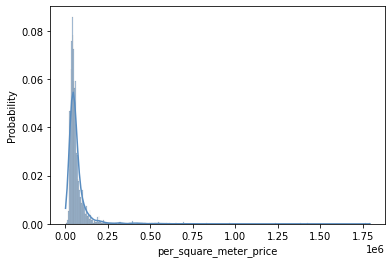

In [98]:
sns.histplot(df_train['per_square_meter_price'], stat='probability', kde=True)
plt.show()

После логарифмирования, распределение целевой переменной стало больше быть похожим на нормальное:

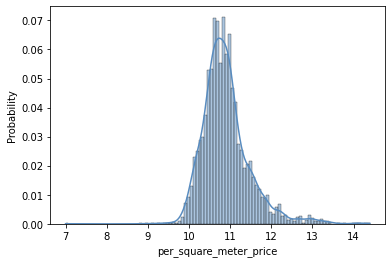

In [99]:
sns.histplot(np.log1p(df_train['per_square_meter_price']), stat='probability', kde=True)
plt.show()

### date

 В тестовой выборке все наблюдения в будущем по сравнению с тренировочной выборкой

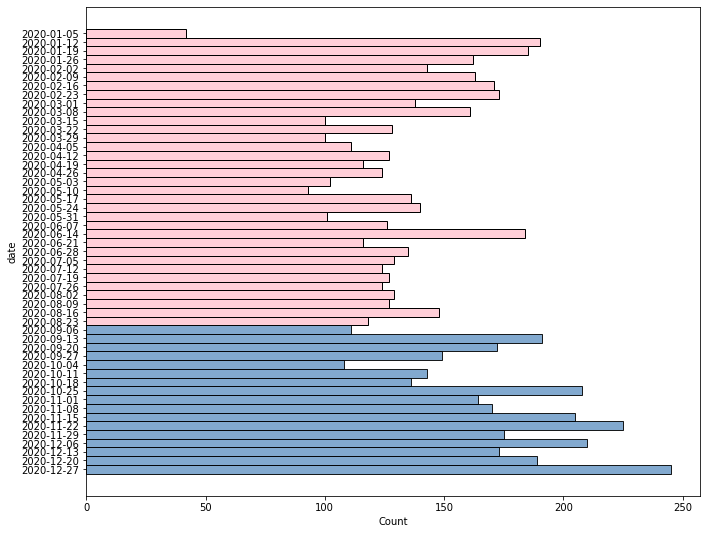

In [100]:
plt.figure(figsize=(11, 9))
sns.histplot(df_train, y=df_train.date, color='pink')
sns.histplot(df_train, y=df_test.date)
plt.show()

### Корреляция

Внутри каждой группы признаков наблюдается высокая корреляция, удалениние высоко-коррелированных признаков с сохранением одного в каждой группе, качество модели не улучшает.

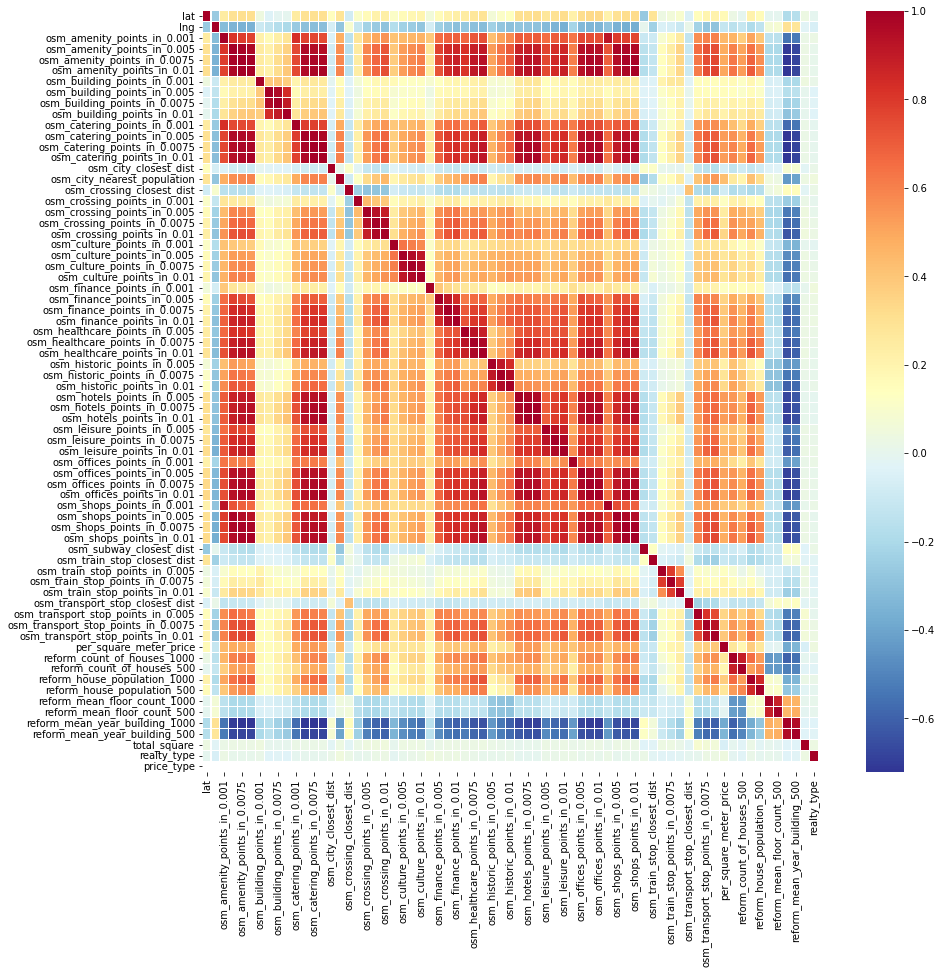

In [101]:
plt.figure(figsize=(14,14))
sns.heatmap(df_train.corr(), linewidths=0.01, cmap='RdYlBu_r')
plt.show()

Посмотрим на признаки с самой высокой корреляцией с целевой переменной

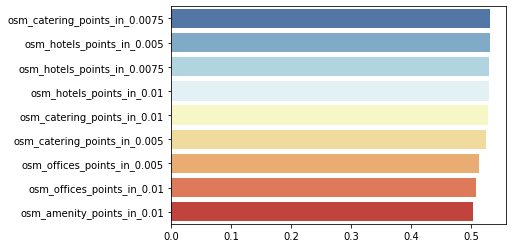

In [102]:
sns.barplot(y=df_train.corr()['per_square_meter_price'].sort_values(ascending=False).head(10).index[1:],
            x=df_train.corr()['per_square_meter_price'].sort_values(ascending=False).head(10).values[1:],
            palette='RdYlBu_r')
plt.show()

Самая высокая корреляция с целевой переменной имеют следующие признаки:
- количесто пунктов общественного питания рядом с помещением;
- количесто отелей рядом с помещением;
- количесто офисов рядом с помещением;
- количесто объектов связаных с удобством рядом с помещением.

### region

И в тренировочной и в тестовой выборках наибольшее количество наблюдений в признаке 'region': 
- Красноярский край;
- Иркутская область;
- Санкт-Петербург.

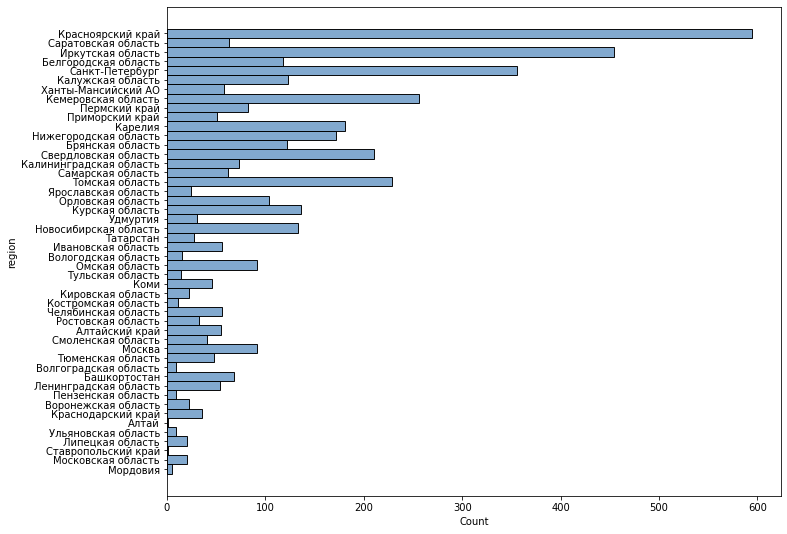

In [103]:
plt.figure(figsize=(11, 9))
sns.histplot(data=df_train, y='region', stat='count')
plt.show()

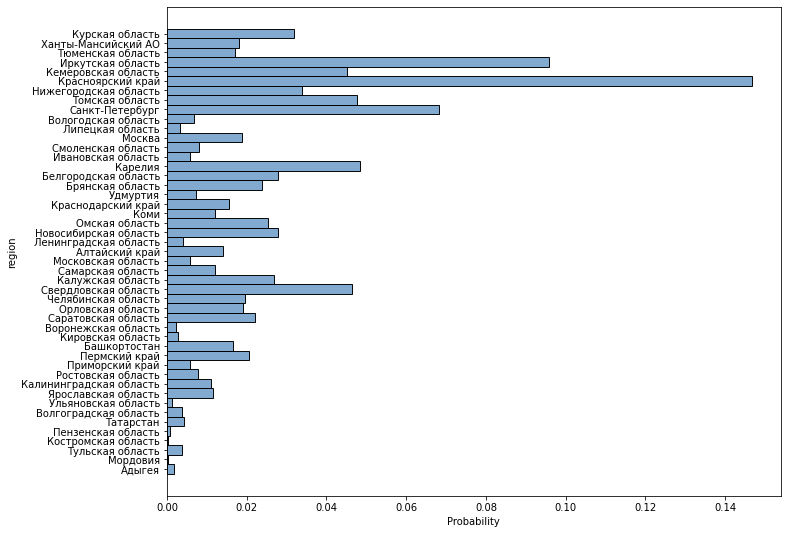

In [104]:
plt.figure(figsize=(11, 9))
sns.histplot(data=df_test, y='region', stat='probability')
plt.show()

### realty_type

И в тестовой и в стренировочной выборках в признаке 'realty_type' преобладает тип '10'.

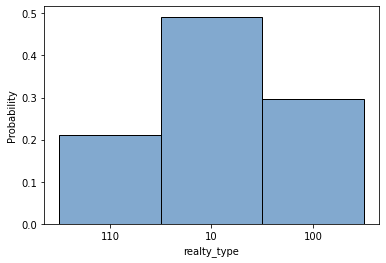

In [105]:
sns.histplot(df_train['realty_type'].astype('str'), stat='probability')
plt.show()

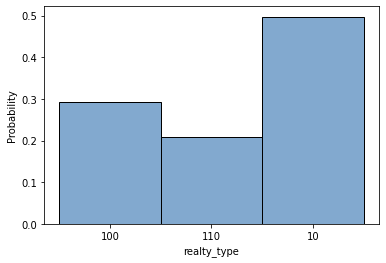

In [106]:
sns.histplot(df_test['realty_type'].astype('str'), stat='probability')
plt.show()

### total_square

Видим, что целевая переменная не зависит от общей площади помещения

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


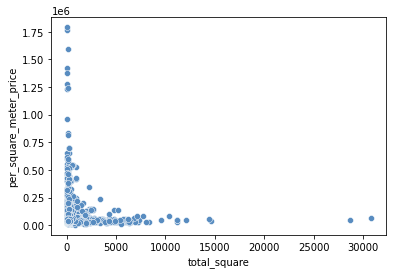

In [107]:
sns.scatterplot(df_train['total_square'], df_train['per_square_meter_price'])
plt.show()

Самые большие помещения сдаются в:
- Свердловская область;
- Новосибирская область;
- Удмуртия.

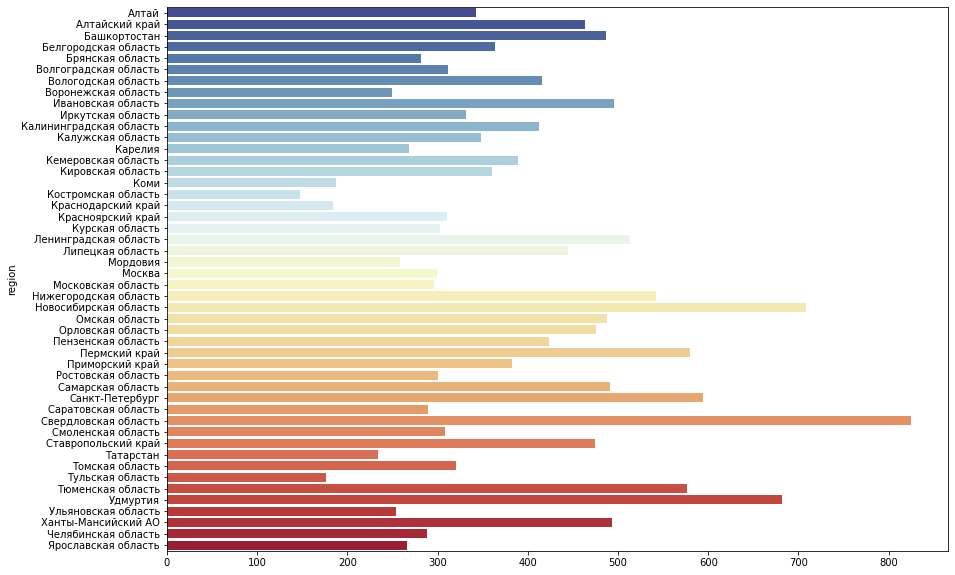

In [108]:
plt.figure(figsize=(14, 10))
sns.barplot(x=df_train.groupby('region')['total_square'].mean().values,
            y=df_train.groupby('region')['total_square'].mean().index,
            palette='RdYlBu_r')

plt.show()